In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

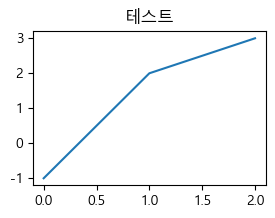

In [2]:
# ----------------------
# 그래프 전역 설정
# ----------------------
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.rc('figure', figsize=(10,4))
pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass

## 데이터 수집 및 전처리
* 행정안전부<br>
https://www.mois.go.kr/<br>
정책자료 > 주민등록인구통계<br>
전체읍면동 현황<br><br>
* 바로가기<br>
https://jumin.mois.go.kr/index.jsp

#### 데이터프레임 생성

In [3]:
# ------------------------
# 데이터프레임 생성
#   - df_all
#   - 천단위 구분자 처리 : thousands
# ------------------------

data_file = 'data/202503_202503_주민등록인구및세대현황_월간.csv'
df_all = pd.read_csv(data_file, encoding='cp949', thousands=',')

In [4]:
df_all.head()

,행정구역,2025년03월_총인구수,2025년03월_세대수,2025년03월_세대당 인구,2025년03월_남자 인구수,2025년03월_여자 인구수,2025년03월_남여 비율
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93
1,서울특별시 종로구 (1111000000),138184,72387,1.91,66450,71734,0.93
2,서울특별시 종로구 청운효자동(1111051500),10986,4915,2.24,5007,5979,0.84
3,서울특별시 종로구 사직동(1111053000),8937,4562,1.96,3940,4997,0.79
4,서울특별시 종로구 삼청동(1111054000),2189,1094,2.00,1049,1140,0.92


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   행정구역             3913 non-null   object 
 1   2025년03월_총인구수    3913 non-null   int64  
 2   2025년03월_세대수     3913 non-null   int64  
 3   2025년03월_세대당 인구  3913 non-null   float64
 4   2025년03월_남자 인구수  3913 non-null   int64  
 5   2025년03월_여자 인구수  3913 non-null   int64  
 6   2025년03월_남여 비율   3913 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 214.1+ KB


#### 컬럼명 변경

In [6]:
# ------------------------
# ['행정구역','총인구수','세대수','세대당 인구','남자 인구수','여자 인구수','남여 비율']
# ------------------------
df_all.columns = ['행정구역','총인구수','세대수','세대당 인구','남자 인구수','여자 인구수','남여 비율']

In [7]:
df_all.head(1)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93


#### 파생컬럼 추가
* 행정구역별
    * 행정구역 컬럼에서 행정구역명만 분리
* str 접근자
    * 시리즈나 컬럼에 문자열 메소드를 적용할 때 사용
        * 예) `컬럼.str.replace(' ', '')`    
    * 시리즈나 컬럼의 문자열 인덱스/슬라이스를 할 때 사용
        * 예) `컬럼.str[3:]`

In [8]:
# ------------------------
# 행정구역명 컬럼 추가
# ------------------------

df_all['행정구역명'] = df_all['행정구역'].str.split(' ').str[0]
df_all.head()

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93,서울특별시
1,서울특별시 종로구 (1111000000),138184,72387,1.91,66450,71734,0.93,서울특별시
2,서울특별시 종로구 청운효자동(1111051500),10986,4915,2.24,5007,5979,0.84,서울특별시
3,서울특별시 종로구 사직동(1111053000),8937,4562,1.96,3940,4997,0.79,서울특별시
4,서울특별시 종로구 삼청동(1111054000),2189,1094,2.00,1049,1140,0.92,서울특별시


## 행정구역별 인구구조 분석
#### 데이터 준비
* 행정구역 레벨의 데이터 조건
    * 행정구역코드가 '00000000'(8자리)로 끝남

In [9]:
# ------------------------
# 행정구역 단위 데이터만 선택
#   - df_region1
#   - 행정구역 코드가 00000000로 끝나는 데이터 선택
# ------------------------

# df_all['행정구역'].str.contains('00000000')
cond = df_all['행정구역'].str[-9:-1] == '00000000'
df_region1 = df_all.loc[cond]


#### 행정구역별 총 인구수 시각화
* 인구수가 많은 행정구역부터 내림차순 정렬
* 정렬된 데이터로 시각화

In [10]:
# -----------------------------------------
# 총 인구수 많은 순으로 정렬
# -----------------------------------------

df_region1_sorted = df_region1.sort_values('총인구수', ascending=False)
df_region1_sorted

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명
1288,경기도 (4100000000),13699381,6078515,2.25,6883349,6816032,1.01,경기도
0,서울특별시 (1100000000),9335734,4497896,2.08,4504618,4831116,0.93,서울특별시
452,부산광역시 (2600000000),3259219,1573392,2.07,1585597,1673622,0.95,부산광역시
3530,경상남도 (4800000000),3219574,1541943,2.09,1623318,1596256,1.02,경상남도
837,인천광역시 (2800000000),3031361,1383536,2.19,1514643,1516718,1.00,인천광역시
3170,경상북도 (4700000000),2523173,1294937,1.95,1276834,1246339,1.02,경상북도
675,대구광역시 (2700000000),2360493,1107511,2.13,1157424,1203069,0.96,대구광역시
2336,충청남도 (4400000000),2135628,1056928,2.02,1095977,1039651,1.05,충청남도
2823,전라남도 (4600000000),1785193,913770,1.95,901154,884039,1.02,전라남도
2564,전북특별자치도 (5200000000),1733574,866245,2.00,863734,869840,0.99,전북특별자치도


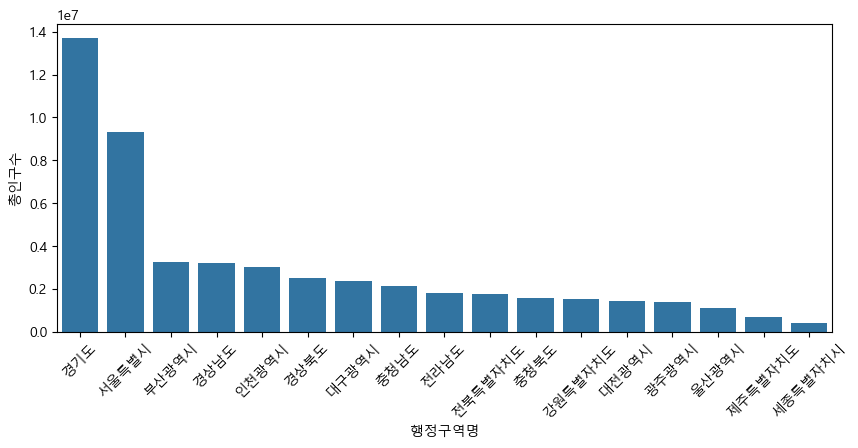

In [11]:
# ------------------------
# seaborn으로 시각화
# ------------------------

sns.barplot(data= df_region1_sorted, x='행정구역명', y='총인구수')
plt.xticks(rotation=45);

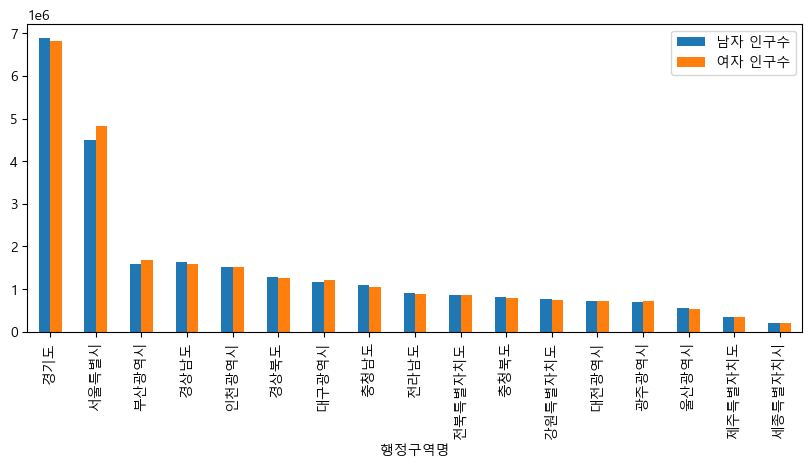

In [12]:
df_region1_sorted.plot(kind='bar', x='행정구역명', y=['남자 인구수','여자 인구수']);

## 시군구별 인구수 시각화

#### 데이터 준비

In [13]:
# ----------------------------------
# 분석할 행정구역 입력받기
#   - 변수명 : region_select
# ----------------------------------

# 행정구역명 입력받기
region_select = input('행정구역명 : ')

# 행정구역명 컬럼에서 입력한 텍스트를 검색해서 정확한 행정구역명을 만들어줍니다.
cond = df_all['행정구역명'].str.contains(region_select)

try:    
    region_select = df_all.loc[cond, '행정구역명'].iloc[0]
    print('분석할 행정구역명:', region_select)
except:
    print('!!! 입력오류 !!!')


분석할 행정구역명: 서울특별시


In [ ]:
# ----------------------
# 입력받은 행정구역의 시군구 데이터 선택
#   - 변수명 : df_region2
#   - 선택조건1. 행정구역명
#   - 선택조건2. 시군구 행정구역코드는 '000000'(6자리) 로 끝남
#   - 선택조건3. 시군구 행정구역코드는 '000000'(8자리) 로 끝나지 않음
# ----------------------




,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명
453,부산광역시 중구 (2611000000),37295,23526,1.59,18087,19208,0.94,부산광역시
463,부산광역시 서구 (2614000000),102891,53679,1.92,49334,53557,0.92,부산광역시
477,부산광역시 동구 (2617000000),85559,47000,1.82,41529,44030,0.94,부산광역시
490,부산광역시 영도구 (2620000000),103032,53547,1.92,50529,52503,0.96,부산광역시
502,부산광역시 부산진구 (2623000000),362533,186462,1.94,173556,188977,0.92,부산광역시
523,부산광역시 동래구 (2626000000),274784,122741,2.24,132398,142386,0.93,부산광역시
537,부산광역시 남구 (2629000000),253613,119803,2.12,123330,130283,0.95,부산광역시
555,부산광역시 북구 (2632000000),266015,122255,2.18,130466,135549,0.96,부산광역시
569,부산광역시 해운대구 (2635000000),375227,169847,2.21,179704,195523,0.92,부산광역시
588,부산광역시 사하구 (2638000000),291246,140774,2.07,144450,146796,0.98,부산광역시


In [ ]:
# ----------------------
# 시군구명 칼럼 생성
# ----------------------


,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,행정구역명,시군구명
453,부산광역시 중구 (2611000000),37295,23526,1.59,18087,19208,0.94,부산광역시,중구
463,부산광역시 서구 (2614000000),102891,53679,1.92,49334,53557,0.92,부산광역시,서구
477,부산광역시 동구 (2617000000),85559,47000,1.82,41529,44030,0.94,부산광역시,동구
490,부산광역시 영도구 (2620000000),103032,53547,1.92,50529,52503,0.96,부산광역시,영도구
502,부산광역시 부산진구 (2623000000),362533,186462,1.94,173556,188977,0.92,부산광역시,부산진구
523,부산광역시 동래구 (2626000000),274784,122741,2.24,132398,142386,0.93,부산광역시,동래구
537,부산광역시 남구 (2629000000),253613,119803,2.12,123330,130283,0.95,부산광역시,남구
555,부산광역시 북구 (2632000000),266015,122255,2.18,130466,135549,0.96,부산광역시,북구
569,부산광역시 해운대구 (2635000000),375227,169847,2.21,179704,195523,0.92,부산광역시,해운대구
588,부산광역시 사하구 (2638000000),291246,140774,2.07,144450,146796,0.98,부산광역시,사하구


In [ ]:
# -------------------
# 총인구수 내림차순 정렬
# --------------------



In [ ]:
# -------------------
# seaborn 시각화를 위한 melt
#   df_region2_melt
# --------------------

#### 시각화

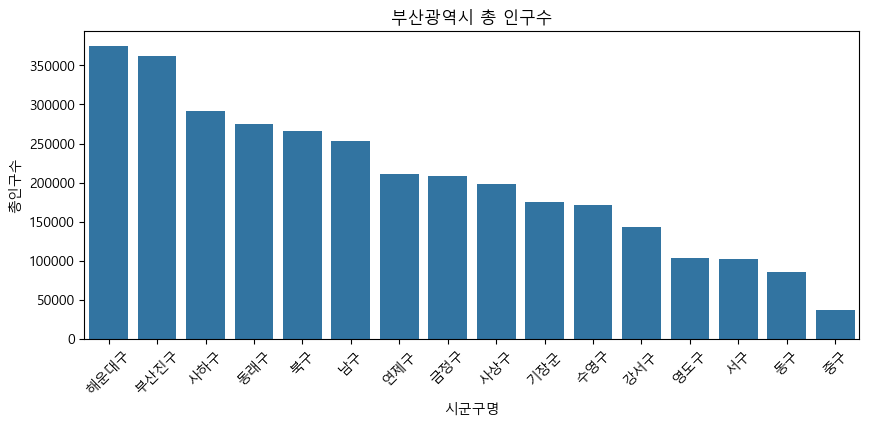

In [ ]:
# -------------------
# 총인구수
# --------------------


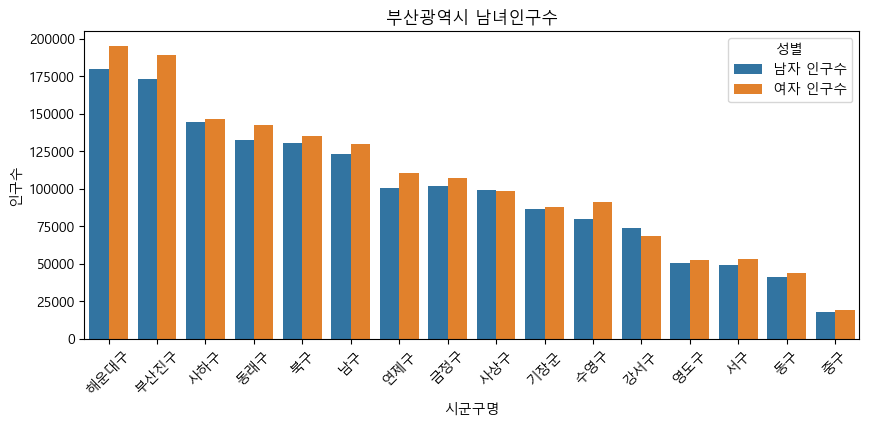

## 읍면동 인구수 시각화

#### 데이터 준비

In [ ]:
# --------------------------------------------------------
# 행정구역의 읍면동 데이터 선택
#   - 변수명 : df_region3
# --------------------------------------------------------


In [ ]:
# --------------------------------------------------------
# '시군구' 칼럼 추가
# '읍면동' 컬럼 추가
# '시군구 읍면동' 칼럼 추가
# --------------------------------------------------------



In [ ]:
# --------------------------------------------------------
# 읍면동별 총인구수 내림차순 정렬
# --------------------------------------------------------



### 시각화

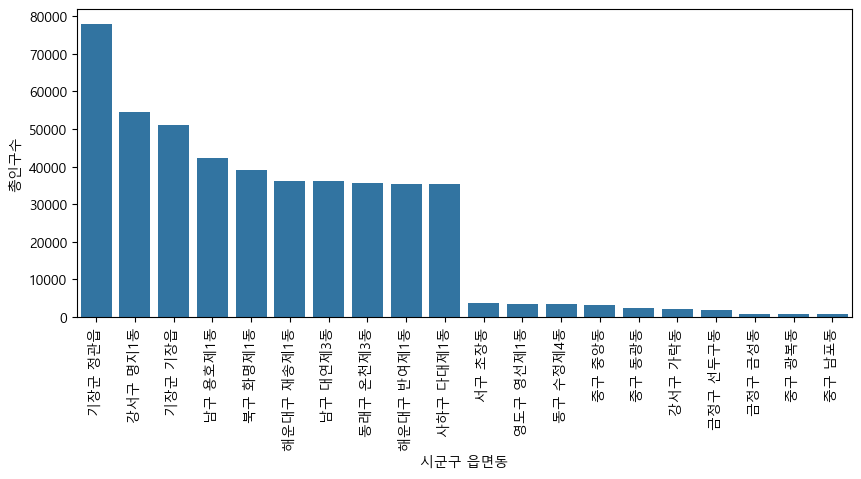

In [ ]:
# --------------------------------------------------------
# 총 인구수 많은 10개 동과 적은 10개 동을 concat하여 시각화
# ---------------------------------------------------------
